In [8]:
import pandas as pd

In [9]:
import os
import pandas as pd
import re

def read_and_concatenate_files_with_labels_and_user(folder_paths,
     column_names):
    # Initialize an empty DataFrame
    result_df = pd.DataFrame(columns=column_names + ['Label', 
                    'User'])

    # Iterate through folder paths
    for folder_label, folder_path in zip(['Reading',
                     'Speaking', 'Watching'], 
                     folder_paths):
        # Initialize an empty list to store DataFrames
        dfs = []

        # Get a sorted list of files in the folder
        files_to_process = sorted([file_name for 
    file_name in os.listdir(folder_path) 
    if file_name.endswith('.csv')])

        # Iterate through sorted files in the folder
        for file_name in files_to_process:
            file_path = os.path.join(folder_path, file_name)
            
            # Read the CSV file without column names and concatenate rows
            df = pd.read_csv(file_path, header=None, 
                             names=column_names)
            
            # Extract numerical user information from 
            #the file name using regular expression
            user_match = re.search(r'(\d+)', file_name)
            user_info = int(user_match.group(1)) if \
            user_match else None
            
            # Add 'Label' and 'User' columns
            df['Label'] = folder_label
            df['User'] = user_info
            dfs.append(df)

            # Print statement for debugging
            #print(f"Processed file: {file_name}, 
            #User: {user_info}, Label: {folder_label}")

        # Concatenate the list of DataFrames vertically
        result_df = pd.concat([result_df, pd.concat(dfs, 
                    ignore_index=True)], ignore_index=True)

    return result_df

# Example usage:
folder_paths = ['Data/Reading', 
    'Data/Speaking', 'Data/Watching']
column_names = ['EEG1', 'EEG2', 'Acc_X', 'Acc_Y', 'Acc_Z']

result_dataframe = read_and_concatenate_files_with_labels_and_user(folder_paths,
                 column_names)

# Print the unique values in the "User" column
#print(result_dataframe['User'].unique())

# Display the resulting DataFrame
print(result_dataframe)


              EEG1        EEG2       Acc_X       Acc_Y       Acc_Z     Label  \
0       842.229919  847.164856 -656.251038  789.063721  136.718964   Reading   
1       845.519897  853.744812 -660.157288  792.969971  136.718964   Reading   
2       847.164856  858.679748 -656.251038  792.969971  136.718964   Reading   
3       843.874939  852.099793 -656.251038  792.969971  140.625214   Reading   
4       847.164856  857.034729 -656.251038  792.969971  136.718964   Reading   
...            ...         ...         ...         ...         ...       ...   
104475  847.164856  857.034729 -703.126099  750.001160  136.718964  Watching   
104476  875.129517  837.294983 -703.126099  750.001160  136.718964  Watching   
104477  852.099793  837.294983 -703.126099  750.001160  136.718964  Watching   
104478  832.360046  870.194580 -707.032349  746.094910  132.812714  Watching   
104479  843.874939  843.874939 -703.126099  746.094910  136.718964  Watching   

       User  
0         1  
1         1

In [10]:
User = result_dataframe['User']

# Separate the data into features (X) and target variable (y)
X = result_dataframe[['EEG1', 'EEG2']]  # Features for EEG1 and EEG2
y = result_dataframe['Label']  # Target variable

# Filter data for User 1
X_test = X[User == 1]
y_test = y[User == 1]

# Filter data for training (excluding User 1)
X_train = X[User != 1]
y_train = y[User != 1]

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train: " ,y_train.shape)
print("y_test: ", y_test.shape)

X_train shape: (93537, 2)
X_test shape: (10943, 2)
y_train:  (93537,)
y_test:  (10943,)


In [11]:
from sklearn.preprocessing import LabelEncoder
LabelEncod = LabelEncoder()
y_train_label = LabelEncod.fit_transform(
   y_train.values.ravel())
y_test_label = LabelEncod.fit_transform(y_test.values.ravel())


In [12]:
import pandas as pd
import numpy as np

# Assuming X_train is your DataFrame and activities_array is your one-hot encoded activities array

# Set the window size
window_size = 400 # You can adjust this value based on your requirement

# Function for sliding window with labels using pandas DataFrames
def sliding_window_with_labels(window_size, signal, labels):
    segments = []
    segment_labels = []
    for i in range(0, len(signal) - window_size + 1, window_size):
        segment = signal.iloc[i:i + window_size]  
        # Assuming signal is a DataFrame
        segment_label = labels.iloc[i + window_size - 1]  
        # Assuming labels is a DataFrame
        segments.append(segment.values)
        segment_labels.append(max(segment_label)) 
         # Accessing the label value assuming it's 
         # in the first column
    return np.array(segments), np.array(segment_labels)

# Extract feature columns from the DataFrame
X_features = X_train[['EEG1', 'EEG2']].to_numpy()

# Create sliding windows and labels
X_windows_train, y_windows_train = sliding_window_with_labels(window_size, 
    pd.DataFrame(X_features), pd.DataFrame(y_train_label))

# Print the shape of the resulting arrays
#print("X_windows shape:", X_windows_train.shape)
#print("y_labels shape:", y_windows_train.shape)
#print("y_labels values:", y_windows_train)


In [13]:
X_features_test = X_test[['EEG1', 'EEG2']].to_numpy()
X_windows_test, y_windows_test = sliding_window_with_labels(window_size,
pd.DataFrame(X_features_test),pd.DataFrame( y_test_label))


Epoch 1/10


233/233 [==============================] - 3s 11ms/step - loss: 33.5142 - accuracy: 0.4635 - val_loss: 1.0634 - val_accuracy: 0.5185
Epoch 2/10
233/233 [==============================] - 2s 11ms/step - loss: 1.3570 - accuracy: 0.5708 - val_loss: 1.0001 - val_accuracy: 0.5185
Epoch 3/10
233/233 [==============================] - 3s 11ms/step - loss: 1.4714 - accuracy: 0.5708 - val_loss: 1.0278 - val_accuracy: 0.5185
Epoch 4/10
233/233 [==============================] - 3s 11ms/step - loss: 3.1240 - accuracy: 0.5665 - val_loss: 1.0255 - val_accuracy: 0.5185
Epoch 5/10
233/233 [==============================] - 2s 9ms/step - loss: 0.9437 - accuracy: 0.5708 - val_loss: 1.0283 - val_accuracy: 0.5185
Epoch 6/10
233/233 [==============================] - 2s 9ms/step - loss: 0.9374 - accuracy: 0.5708 - val_loss: 1.0271 - val_accuracy: 0.5185
Epoch 7/10
233/233 [==============================] - 2s 9ms/step - loss: 1.0120 - accuracy: 0.5665 - val_loss: 1.0293 - val_accuracy: 0.5185
Epoch 8/10
2

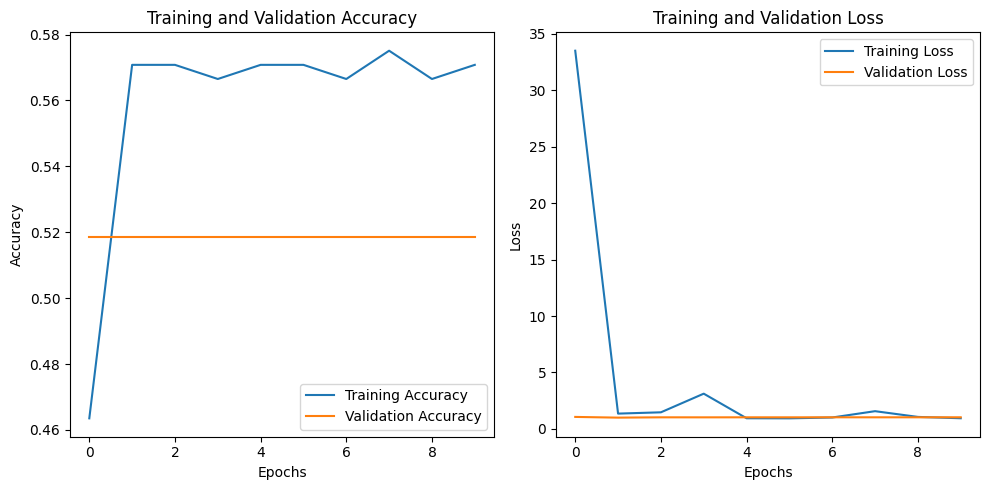

In [14]:
import tensorflow as tf
from tensorflow import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, \
Flatten, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt


# Assuming 'X' is your input data of shape 
#(1044, 100, 6) and 'y' is your corresponding labels
train_steps_per_epoch = len(X_windows_train)
val_steps_per_epoch  = len(X_windows_test)
# Define the CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, \
MaxPooling1D, Flatten, Dense, Dropout, LSTM
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler

tf.random.set_seed(42)




model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu',
            input_shape=(X_windows_train.shape[1], X_windows_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])










# Compile the model

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy()
, 
              metrics=['accuracy'])

# Train the model

history = model.fit(X_windows_train, y_windows_train, 
                    epochs=10, 
                    validation_data=(X_windows_test, y_windows_test) ,steps_per_epoch=train_steps_per_epoch,
validation_steps=val_steps_per_epoch
                  )


#   steps_per_epoch=train_steps_per_epoch,

#  validation_steps=val_steps_per_epoch



# Accessing the history of training
training_accuracy = history.history.get('accuracy') \
    or history.history.get('acc')
training_loss = history.history['loss']
validation_accuracy = history.history.get('val_accuracy')\
or history.history.get('val_acc')
validation_loss = history.history.get('val_loss') \
or history.history.get('validation_loss')

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
if training_accuracy:
    plt.plot(training_accuracy, label='Training Accuracy')
if validation_accuracy:
    plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
if validation_loss:
    plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()